# Analytical Dataset Exploration

## Date Created: 1/20/21
## Authors: Geri, Millie, JJ

This notebook serves as a place to do data exploration on the `initial_analytic_dataset.csv` which holds all the variables of interest from each of our respective datasets. This is a place to look at the relationships between variables and other assumption checks.

In [1]:
#Packages import
#import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import base64

#Note: You only need to import what you will be using in the notebook. 

In [2]:
file = open("initial_analytic_dataset.csv", "r")
analytic_data = pd.read_csv("initial_analytic_dataset.csv")

In [3]:
analytic_data

,county,year,id,state,broadband_pct,total_pop_enrolled,percent_total_pop_enrolled,margin_total_pop,est_total_pop_16_over,est_emp_pop_ratio_16_over,...,est_total_households_with_no4,est_total_households_none,est_total_households_with_sub,est_total_households_with_du,est_total_households_with_broadband,est_total_households_with_cellular,est_total_households_with_cell_no,est_total_households_with_cable,est_total_households_with_sat,est_total_households_without_sub
0,Abbeville County,2018.0,0500000US45001,South Carolina,0.657,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acadia Parish,2018.0,0500000US22001,Louisiana,0.709,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Accomack County,2018.0,0500000US51001,Virginia,0.638,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ada County,2018.0,0500000US16001,Idaho,0.812,83254.0,70.9,2281.0,371124.0,63.3,...,41657.0,25819.0,336892.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adair County,2018.0,0500000US21001,Kentucky,0.666,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,NaN,NaN,0500000US72113,NaN,NaN,19965.0,60.8,956.0,110975.0,33.5,...,16151.0,13235.0,91808.0,NaN,NaN,NaN,NaN,NaN,NaN,110086.0
3141,NaN,NaN,0500000US72127,NaN,NaN,44217.0,56.6,1358.0,271287.0,45.1,...,36817.0,36566.0,175037.0,38417.0,NaN,NaN,NaN,42094.0,13601.0,266076.0
3142,NaN,NaN,0500000US72135,NaN,NaN,12180.0,70.4,1268.0,NaN,NaN,...,NaN,NaN,52289.0,NaN,NaN,NaN,NaN,NaN,NaN,58415.0
3143,NaN,NaN,0500000US72137,NaN,NaN,11050.0,63.9,541.0,62985.0,43.0,...,8192.0,6531.0,49107.0,7121.0,NaN,NaN,NaN,NaN,NaN,61835.0


In [4]:
for col in analytic_data.columns:
    print(col)

county
year
id
state
broadband_pct
total_pop_enrolled
percent_total_pop_enrolled
margin_total_pop
est_total_pop_16_over
est_emp_pop_ratio_16_over
est_unemp_pop_ratio_16_over
est_total_households_x
est_med_income_households
est_total_families
est_med_income_families
est_total_households_y
est_total_households_with_device
est_total_households_with_desktop
est_total_households_with_no
est_total_households_with_smartphone
est_total_households_with_no2
est_total_households_with_portable
est_total_households_with_no3
est_total_households_with_other
est_total_households_with_no4
est_total_households_none
est_total_households_with_sub
est_total_households_with_du
est_total_households_with_broadband
est_total_households_with_cellular
est_total_households_with_cell_no
est_total_households_with_cable
est_total_households_with_sat
est_total_households_without_sub


Note from Millie: @JJ - Can you provide documentation onw hat the different "est_total_households_with_no" are? I am assuming that it mean no for a specific device, perhaps the one above, but I would like that confirmed.

In [5]:
analytic_data["broadband_pct"] = analytic_data["broadband_pct"] *100
analytic_data["broadband_pct"]

0       65.700001
1       70.899999
2       63.800001
3       81.200004
4       66.600001
          ...    
3140          NaN
3141          NaN
3142          NaN
3143          NaN
3144          NaN
Name: broadband_pct, Length: 3145, dtype: float64

In [6]:
analytic_data

,county,year,id,state,broadband_pct,total_pop_enrolled,percent_total_pop_enrolled,margin_total_pop,est_total_pop_16_over,est_emp_pop_ratio_16_over,...,est_total_households_with_no4,est_total_households_none,est_total_households_with_sub,est_total_households_with_du,est_total_households_with_broadband,est_total_households_with_cellular,est_total_households_with_cell_no,est_total_households_with_cable,est_total_households_with_sat,est_total_households_without_sub
0,Abbeville County,2018.0,0500000US45001,South Carolina,65.700001,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acadia Parish,2018.0,0500000US22001,Louisiana,70.899999,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Accomack County,2018.0,0500000US51001,Virginia,63.800001,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ada County,2018.0,0500000US16001,Idaho,81.200004,83254.0,70.9,2281.0,371124.0,63.3,...,41657.0,25819.0,336892.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adair County,2018.0,0500000US21001,Kentucky,66.600001,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,NaN,NaN,0500000US72113,NaN,NaN,19965.0,60.8,956.0,110975.0,33.5,...,16151.0,13235.0,91808.0,NaN,NaN,NaN,NaN,NaN,NaN,110086.0
3141,NaN,NaN,0500000US72127,NaN,NaN,44217.0,56.6,1358.0,271287.0,45.1,...,36817.0,36566.0,175037.0,38417.0,NaN,NaN,NaN,42094.0,13601.0,266076.0
3142,NaN,NaN,0500000US72135,NaN,NaN,12180.0,70.4,1268.0,NaN,NaN,...,NaN,NaN,52289.0,NaN,NaN,NaN,NaN,NaN,NaN,58415.0
3143,NaN,NaN,0500000US72137,NaN,NaN,11050.0,63.9,541.0,62985.0,43.0,...,8192.0,6531.0,49107.0,7121.0,NaN,NaN,NaN,NaN,NaN,61835.0


### Broadband Percent v. Percent Total Population Enrolled

Text(0.5, 0, 'Broadband Percentage')

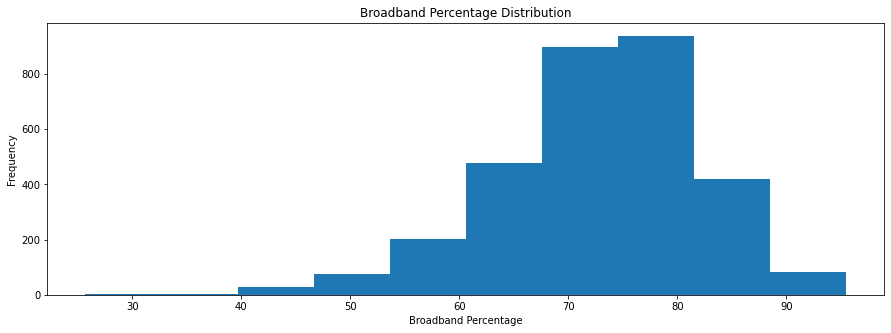

In [7]:
analytic_data["broadband_pct"].plot.hist(figsize=(15, 5))
plt.title("Broadband Percentage Distribution")
plt.xlabel("Broadband Percentage")

Text(0.5, 0, 'Total Pop Enrolled')

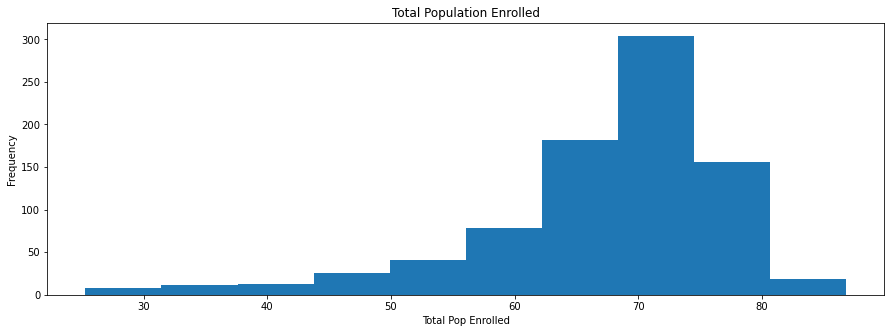

In [8]:
analytic_data["percent_total_pop_enrolled"].plot.hist(figsize=(15, 5))
plt.title("Total Population Enrolled")
plt.xlabel("Total Pop Enrolled")

Text(0, 0.5, 'Total Population Enrolled')

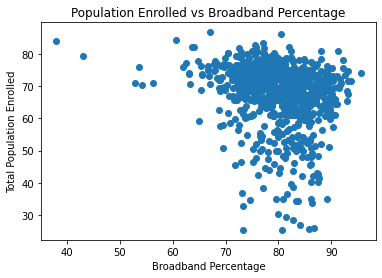

In [9]:
plt.scatter(x = analytic_data["broadband_pct"], y = analytic_data["percent_total_pop_enrolled"]) # The plot
plt.title("Population Enrolled vs Broadband Percentage") # Adding a title
plt.xlabel("Broadband Percentage") # Adding axis labels
plt.ylabel("Total Population Enrolled")

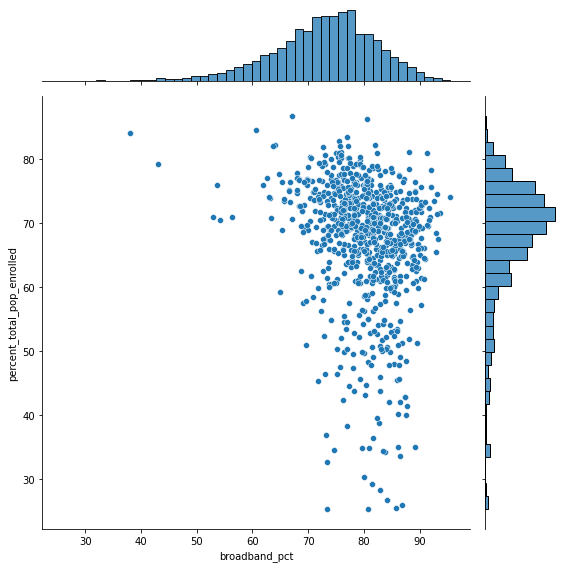

In [10]:
#Note from Millie: I added this plot because I thought it might be more useful than looking at three different plots
sns.jointplot(data = analytic_data, x = "broadband_pct", y = "percent_total_pop_enrolled", height = 8); 

### Distrubution of Devices in Households

For now, looking at all households with some sort of device against total households.

In [11]:
devices_in_hh = analytic_data[['id','est_total_households_y',
'est_total_households_with_device',
'est_total_households_with_desktop',
'est_total_households_with_smartphone',
'est_total_households_with_portable',
'est_total_households_with_other',
'est_total_households_none']]

In [12]:
to_pivot = devices_in_hh[['id','est_total_households_y',
'est_total_households_with_device',
'est_total_households_with_desktop',
'est_total_households_with_smartphone',
'est_total_households_with_portable',
'est_total_households_with_other',
'est_total_households_none']]

plot_devices_df = pd.melt(devices_in_hh, id_vars = 'id', value_vars = to_pivot, var_name = "type", value_name = "value")

plot_devices_df['value2'] = plot_devices_df['value']*.001

In [13]:
plot_devices_df.describe()

,value,value2
count,5.747000e+03,5747.000000
mean,6.029339e+04,60.293393
std,2.033937e+05,203.393731
min,2.178000e+03,2.178000
25%,7.475500e+03,7.475500
50%,1.438200e+04,14.382000
75%,4.654500e+04,46.545000
max,8.162030e+06,8162.030000


There is a huge std and daat is heavily skewed to the right. 

In [14]:
plot_devices_df

,id,type,value,value2
0,0500000US45001,est_total_households_y,NaN,NaN
1,0500000US22001,est_total_households_y,NaN,NaN
2,0500000US51001,est_total_households_y,NaN,NaN
3,0500000US16001,est_total_households_y,371124.0,371.124
4,0500000US21001,est_total_households_y,NaN,NaN
...,...,...,...,...
22010,0500000US72113,est_total_households_none,13235.0,13.235
22011,0500000US72127,est_total_households_none,36566.0,36.566
22012,0500000US72135,est_total_households_none,NaN,NaN
22013,0500000US72137,est_total_households_none,6531.0,6.531


In [15]:
employment_info = analytic_data[['id', 'est_total_pop_16_over', 'est_emp_pop_ratio_16_over', 
                                 'est_unemp_pop_ratio_16_over']]

plot_employ_df = pd.melt(employment_info, id_vars = 'id', value_vars = ['est_emp_pop_ratio_16_over', 
                                 'est_unemp_pop_ratio_16_over'], var_name = "type", value_name = "value")

plot_employ_df['value2'] = plot_devices_df['value']*.001

plot_employ_df.describe()


,value,value2
count,1642.000000,1642.000000
mean,31.830390,144.755197
std,27.257013,358.652809
min,1.100000,2.594000
25%,4.600000,8.929500
50%,24.800000,55.612500
75%,59.175000,132.475750
max,76.500000,8162.030000


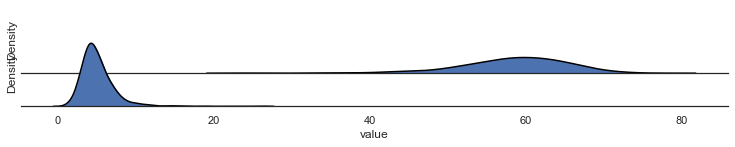

In [16]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(plot_employ_df, row="type", aspect=9, height=1.2, palette = pal)

g.map_dataframe(sns.kdeplot, x="value", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="value", color='black')
g.fig.subplots_adjust(hspace=-.5)


g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

Density plot above is incomplete. Currently troubleshooting. 

References for facet density plot:
- https://seaborn.pydata.org/examples/kde_ridgeplot.html
- https://python.plainenglish.io/ridge-plots-with-pythons-seaborn-4de5725881af